In [1]:
#importing libraries and packages

import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data

Image shape: (512, 512)
Image dataType: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'negative')

<Figure size 640x480 with 0 Axes>

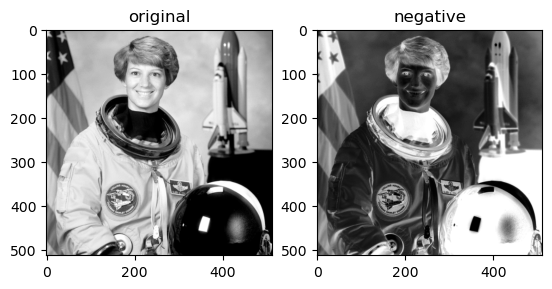

In [4]:
#define astronaut image from 'skimage' library
image = data.astronaut()[:,:,0]
print("Image shape:", image.shape)
print("Image dataType:", type(image))

#setting the color map to gray sacle
plt.gray()
#plot subplots
f,arr = plt.subplots(1,2)
#show the original image
arr[0].imshow(image)
arr[0].set_title('original')
image2 = 255-image
#show the negative of the image
arr[1].imshow(image2)
arr[1].set_title('negative')

Write a Python program to to reduce the number of intensity levels in an image from 256 to 2, in integer powers of 2. The desired number of intensity levels needs to be a variable input to your program.

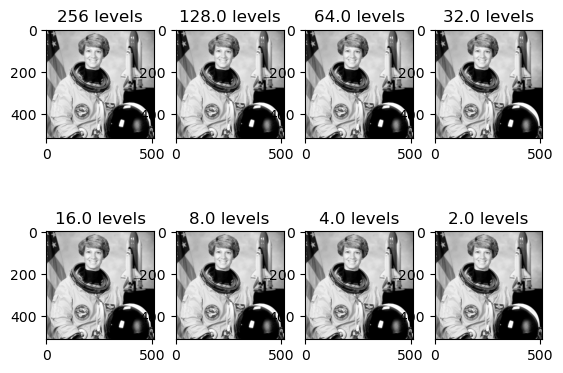

In [10]:
#color quantization to reduce number of intensity levels

f, axarr = plt.subplots(2, 4)
levels = 256s
for i in range(2):
    for j in range(4):
        im_mod = np.array(np.floor(image/(256/levels)*(256/levels)),dtype=np.int32)
        axarr[i,j].imshow(im_mod);
        axarr[i, j].set_title('{} levels'.format(levels))
        levels /= 2

Load an image and then perform a simple spatial 3x3 average of image pixels. Repeat the process for a 10x10 neighborhood and again for a 20x20 neighborhood.

Text(0.5, 1.0, '20x20')

<Figure size 640x480 with 0 Axes>

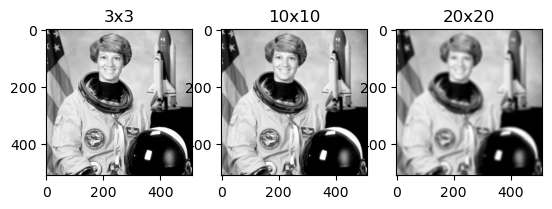

In [12]:

ker=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plt.gray()
f,arr=plt.subplots(1,3)
image3k=cv2.blur(image,(3,3))
image10k=cv2.blur(image,(10,10))
image20k=cv2.blur(image,(20,20))

arr[0].imshow(image)
arr[0].set_title('3x3')
arr[1].imshow(image3k)
arr[1].set_title('10x10')
arr[2].imshow(image10k)
arr[2].set_title('20x20')


Rotate an image by 45 and 90 degrees.

Text(0.5, 1.0, '45 degrees rotation')

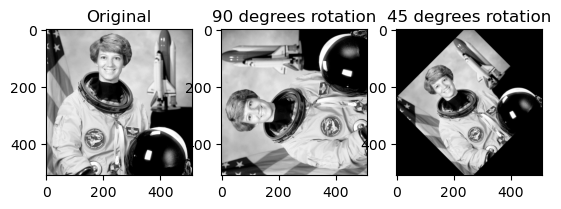

In [14]:
# Get the image dimensions
height, width = image.shape[:2]
# Define the rotation matrix
M = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
# Perform the rotation for 90 degrees
rotated_img_90 = cv2.warpAffine(image, M, (width, height))

# Define the rotation matrix for 45 degrees
M = cv2.getRotationMatrix2D((width/2, height/2), 45, 0.75)
rotated_img_45 = cv2.warpAffine(image, M, (width, height))

#plotting the original,90 degreee,and 45 degree rotated image
f,arr = plt.subplots(1,3)
arr[0].imshow(image) 
arr[0].set_title('Original')
arr[1].imshow(rotated_img_90) 
arr[1].set_title('90 degrees rotation')
arr[2].imshow(rotated_img_45) 
arr[2].set_title('45 degrees rotation')

For every 3×3 block of the image (without overlapping), replace all corresponding 9 pixels by their average. This operation simulates reducing the image spatial resolution. Repeat this for 5×5 blocks and 7×7 blocks.

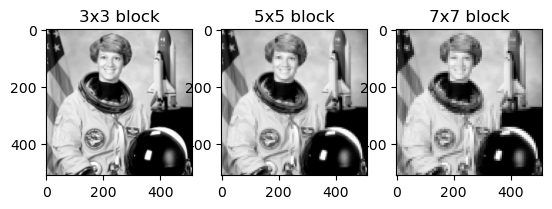

In [22]:
#Assign the block sizes
BLOCK_SIZES = (3,5,7)

# Get the shape of the image
image_shape = image.shape

# Create a figure with subplots
figure, axes = plt.subplots(1, len(BLOCK_SIZES))

# Iterate through the block sizes
for i, size in enumerate(BLOCK_SIZES):
    # Make a copy of the original image
    modified_image = image.copy()
    # Iterate through the rows of the image
    for r in range(size//2,image_shape[0],size):
        # Iterate through the columns of the image
        for c in range(size//2,image_shape[1],size):
            # Replace the current block with the average value of the pixels in the block
            modified_image[r-size//2:r+size//2+1,c-size//2:c+size//2+1] = np.average(image[r-size//2:r+size//2+1,c-size//2:c+size//2+1])
    
    # Show the modified image in the current subplot
    axes[i].imshow(modified_image)
    # Set the title of the current subplot to show the block size used
    axes[i].set_title('{}x{} block'.format(size,size))